# FORECASTNG STOCK MARKET TRENDS

EDS 6340 INTRODUCTION TO DATA SCIENCE

GROUP 16


| **Name**                | **ID**      |
|-------------------------|-------------|
| Sai Shashank Gandavarapu | 2402666     |
| Aakanksha Govindaraju    | 2384001     |
| Gowtham Chowdam          | 2397801     |
| Kiran Kulkarni           | 2330104     |
| Nagesh Vaka              | 2407326     |


## Importing Packages

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import StackingRegressor

## Load the Dataset

In [ ]:
df = pd.read_csv('Cleaned&Processed_Data.csv')

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head(15)

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU,DJI,S&P
0,2009-12-31,10428.049805,0.515598,0.014951,0.014951,0.014951,0.014951,1.823357,1.741463,-2.216996,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.000640,0.000697
1,2009-12-31,1115.099976,-0.001074,0.016043,0.016043,0.016043,0.016043,2.679581,1.876967,-1.642897,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.014951,0.000697
2,2009-12-31,2269.149902,0.000000,0.017306,0.017306,0.017306,0.017306,2.116212,0.830271,-2.571441,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.014951,0.000697
3,2009-12-31,7184.959961,-0.001183,0.019733,0.019733,0.019733,0.019733,3.345741,2.391525,-1.556447,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.014951,0.016043
4,2009-12-31,625.390015,-0.001074,0.023521,0.023521,0.023521,0.023521,3.065284,2.009947,-1.164078,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.014951,0.016043
5,2010-01-04,10583.959961,0.515598,0.014951,0.014951,0.014951,0.014951,1.823357,1.741463,-2.216996,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.000640,0.000697
6,2010-01-04,2308.419922,0.000000,0.017306,0.017306,0.017306,0.017306,2.116212,0.830271,-2.571441,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.014951,0.000697
7,2010-01-04,1132.989990,-0.001074,0.016043,0.016043,0.016043,0.016043,2.679581,1.876967,-1.642897,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.014951,0.000697
8,2010-01-04,7326.740234,-0.001183,0.019733,0.019733,0.019733,0.019733,3.345741,2.391525,-1.556447,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.014951,0.016043
9,2010-01-04,640.099976,-0.001074,0.023521,0.023521,0.023521,0.023521,3.065284,2.009947,-1.164078,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.014951,0.016043


## Feature Selection And Feature Engineering

In [ ]:
# Identify correlated features
correlated_features = df.corr(numeric_only=True)['Close'].sort_values(ascending=False)
print(correlated_features)

high_correlation_threshold = 0.6
high_positive_corr_features = correlated_features[correlated_features > high_correlation_threshold].index.tolist()
high_negative_corr_features = correlated_features[correlated_features < -high_correlation_threshold].index.tolist()


Close      1.000000
EMA_10     0.999873
EMA_20     0.999739
EMA_50     0.999420
EMA_200    0.998304
             ...   
DE6       -0.189357
DE5       -0.190716
DE4       -0.194123
Volume    -0.575212
Name      -0.751572
Name: Close, Length: 85, dtype: float64


In [ ]:
data_numeric = df.drop(['Date', 'Name'], axis=1)
correlation_matrix = data_numeric.corr()

high_corr_pairs = correlation_matrix.unstack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.8) & (high_corr_pairs['Feature1'] != high_corr_pairs['Feature2'])]

print("Highly correlated feature pairs:")
print(high_corr_pairs)

Highly correlated feature pairs:
            Feature1        Feature2  Correlation
10             Close          EMA_10     0.999873
11             Close          EMA_20     0.999739
12             Close          EMA_50     0.999420
13             Close         EMA_200     0.998304
231              mom           DJI-F     0.803152
...              ...             ...          ...
6374           S&P-F       RUSSELL-F     0.801743
6546  Dollar index-F    Dollar index     0.988209
6629    Dollar index  Dollar index-F     0.988209
6793             XAG        silver-F     0.827305
6951             DJI           DJI-F     0.826549

[134 rows x 3 columns]


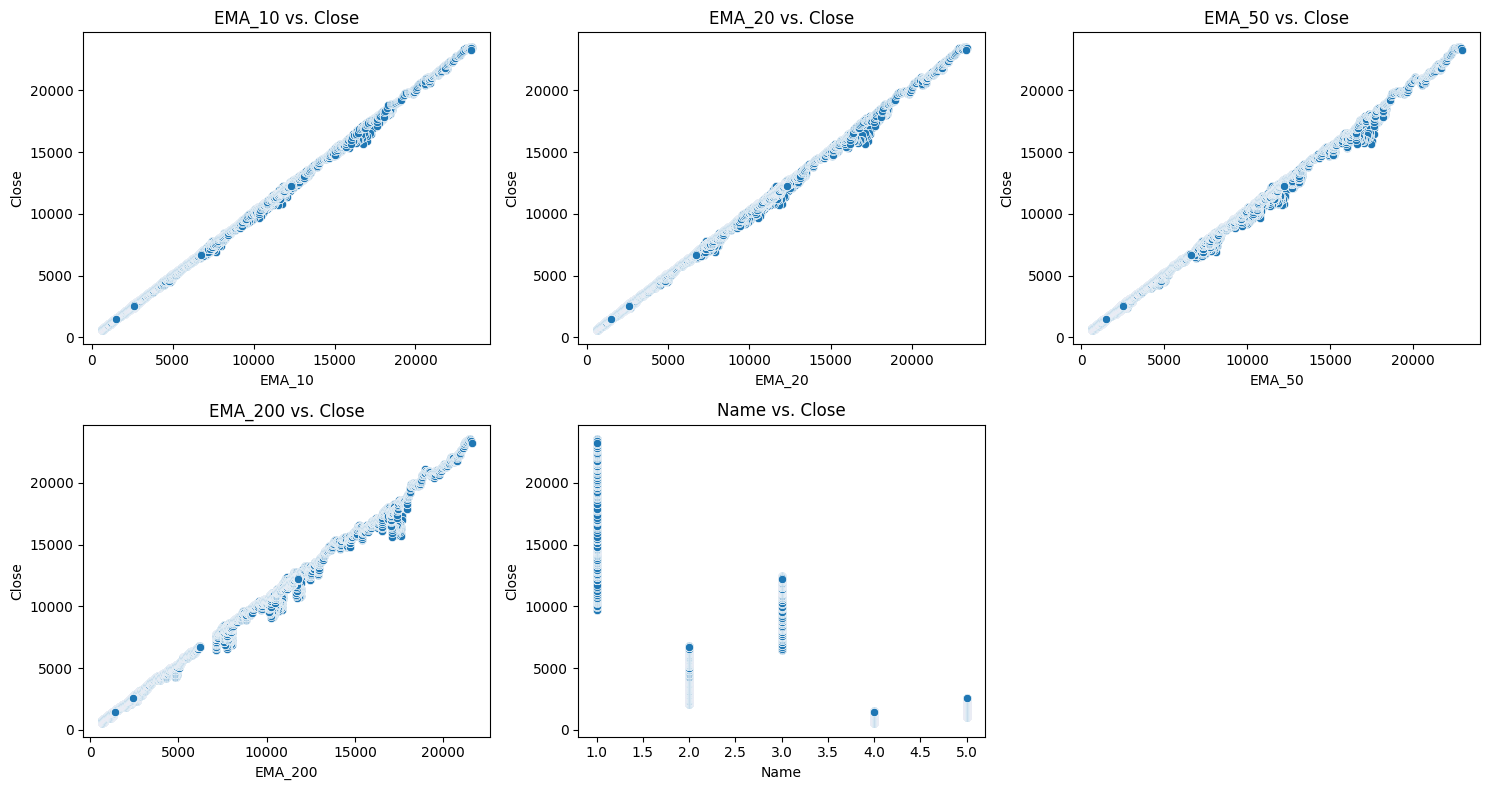

In [ ]:
correlated_features = high_positive_corr_features + high_negative_corr_features
correlated_features = [feature for feature in correlated_features if feature != 'Close']
grid_cols = 3
grid_rows = math.ceil(len(correlated_features) / grid_cols)
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(grid_cols * 5, grid_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(correlated_features):
    sns.scatterplot(x=feature, y='Close', data=df, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs. Close')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Close')

for i in range(len(correlated_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()


In [ ]:
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Close_RollingMean'] = df['Close'].rolling(window=3).mean()
df = df.dropna()

print(df[['Close', 'Close_Lag1', 'Close_Lag2', 'Close_RollingMean']].head())

          Close    Close_Lag1    Close_Lag2  Close_RollingMean
2   2269.149902   1115.099976  10428.049805        4604.099894
3   7184.959961   2269.149902   1115.099976        3523.069946
4    625.390015   7184.959961   2269.149902        3359.833293
5  10583.959961    625.390015   7184.959961        6131.436646
6   2308.419922  10583.959961    625.390015        4505.923299


In [ ]:
# Select correlated features
selected_features = [
    'mom',          # Momentum
    'EMA_10',       # Strong EMA correlation with Close
    'S&P-F',        # Market index tied to mom
    'DGS10',        # Interest rate capturing macro trends
    'Oil',          # Commodity market influence
    'Dollar index', # Currency index
    'FTSE-F',       # Global market trends
    'HSI'           # Regional market trends
]
# Generate interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features = poly.fit_transform(df[selected_features])

interaction_feature_names = poly.get_feature_names_out(selected_features)
interaction_df = pd.DataFrame(interaction_features, columns=interaction_feature_names)
df_Corr = df.copy()
df = pd.concat([df_Corr, interaction_df], axis=1)

print("Interaction features added:", interaction_feature_names)

Interaction features added: ['mom' 'EMA_10' 'S&P-F' 'DGS10' 'Oil' 'Dollar index' 'FTSE-F' 'HSI'
 'mom EMA_10' 'mom S&P-F' 'mom DGS10' 'mom Oil' 'mom Dollar index'
 'mom FTSE-F' 'mom HSI' 'EMA_10 S&P-F' 'EMA_10 DGS10' 'EMA_10 Oil'
 'EMA_10 Dollar index' 'EMA_10 FTSE-F' 'EMA_10 HSI' 'S&P-F DGS10'
 'S&P-F Oil' 'S&P-F Dollar index' 'S&P-F FTSE-F' 'S&P-F HSI' 'DGS10 Oil'
 'DGS10 Dollar index' 'DGS10 FTSE-F' 'DGS10 HSI' 'Oil Dollar index'
 'Oil FTSE-F' 'Oil HSI' 'Dollar index FTSE-F' 'Dollar index HSI'
 'FTSE-F HSI']


In [ ]:
Selectedfeatures = ['Close', 'EMA_10', 'ROC_5', 'ROC_10', 'ROC_20', 'ROC_15', 'DGS10', 'IXIC', 'DE6', 'EMA_50', 'mom FTSE-F', 'AAPL', 'Oil Dollar index']

In [ ]:
df = df[Selectedfeatures]

## Dataset Spliting And Scaling

In [ ]:
def scale_data(df_X, df_y):
  numerical_features_X = df_X.select_dtypes(include=['number']).columns

  if isinstance(df_y, pd.Series):
    df_y = df_y.to_frame()

  numerical_features_y = df_y.select_dtypes(include=['number']).columns
  scaler_X = MinMaxScaler()
  scaler_y = MinMaxScaler()

  df_X_scaled = df_X.copy()
  df_y_scaled = df_y.copy()
  df_X_scaled[numerical_features_X] = scaler_X.fit_transform(df_X[numerical_features_X])
  df_y_scaled[numerical_features_y] = scaler_y.fit_transform(df_y[numerical_features_y])

  return df_X_scaled, df_y_scaled.squeeze()

In [ ]:
df.dropna(inplace=True)
y = df['Close']
X = df.drop("Close", axis=1)

In [ ]:
# Train-test split for
train_size = int(0.8 * len(X))

train = X.iloc[:train_size]
test = X.iloc[train_size:]

X_train, y_train = train, y.iloc[:train_size]
X_test, y_test = test, y.iloc[train_size:]

X_train, y_train = scale_data(X_train, y_train)
X_test, y_test = scale_data(X_test, y_test)

In [ ]:
mse_results = {}
r2_results = {}
mae_results = {}
rmse_results = {}

## XGBoost Model

XGBoost (eXtreme Gradient Boosting) is an advanced, high-performance implementation of gradient boosting designed for speed and efficiency. It is widely used for both classification and regression tasks and is known for its scalability and effectiveness in handling large datasets and complex problems.

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb_model.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = xgb_model.predict(X_test.to_numpy())

print("Below are the evaluation metrics:")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")
r2_results["XGBoost"] = r2
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
mse_results["XGBoost"] = mse
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
rmse_results["XGBoost"] = rmse
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
mae_results["XGBoost"] = mae
y_train_pred = xgb_model.predict(X_train.to_numpy())

Below are the evaluation metrics:
R^2: 0.9995626918422443
MSE: 4.1898192600693983e-05
RMSE: 0.006472881321381845
MAE: 0.004232977727383458


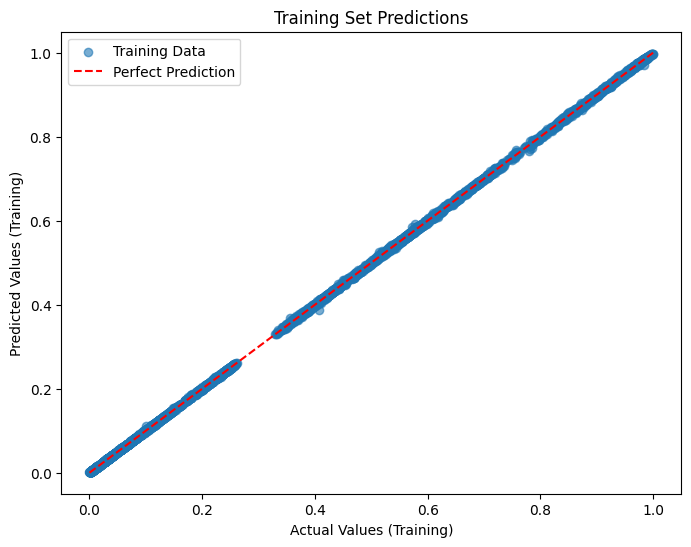

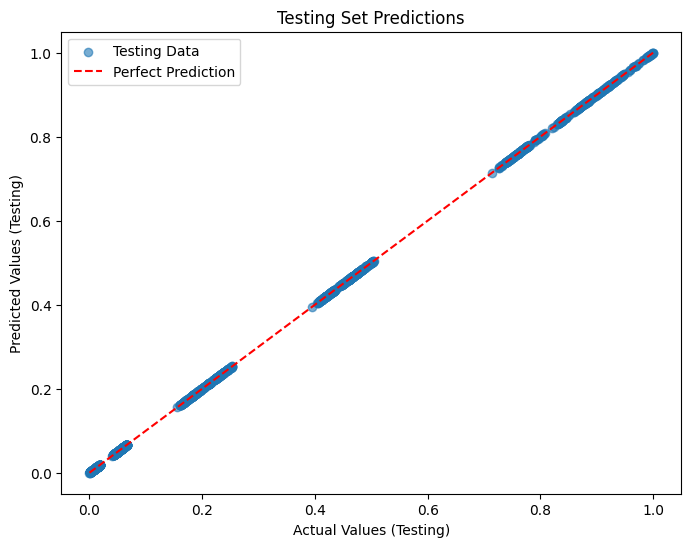

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Training Set Predictions")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, label='Testing Data', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("Testing Set Predictions")
plt.legend()
plt.show()

## Extreme Learning Machine (ELM) Model

The Extreme Learning Machine (ELM) is a single-layer feedforward neural network (SLFN) that provides extremely fast training compared to traditional neural networks. It is designed for both classification and regression tasks and is particularly useful for large-scale data processing.

In [ ]:
! pip install hpelm

In [ ]:
from hpelm import ELM

elm_model = ELM(X_train.shape[1], 1)
elm_model.add_neurons(100, "sigm")
elm_model.train(X_train.to_numpy(), y_train.to_numpy())
y_pred = elm_model.predict(X_test.to_numpy())

print("Below are the evaluation metrics:")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")
r2_results["ELM"] = r2
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
mse_results["ELM"] = mse
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
rmse_results["ELM"] = rmse
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
mae_results["ELM"] = mae
y_train_pred = elm_model.predict(X_train.to_numpy())

Below are the evaluation metrics:
R^2: 0.9990926192540855
MSE: 8.69355226520305e-05
RMSE: 0.009323922063811479
MAE: 0.006566975552830539


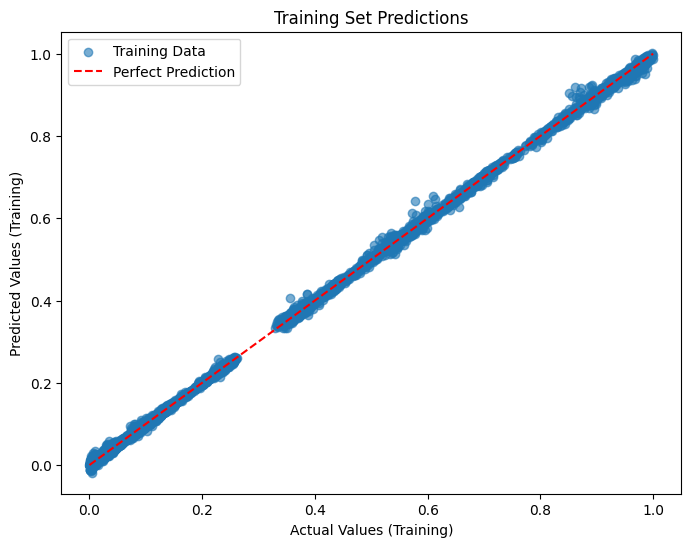

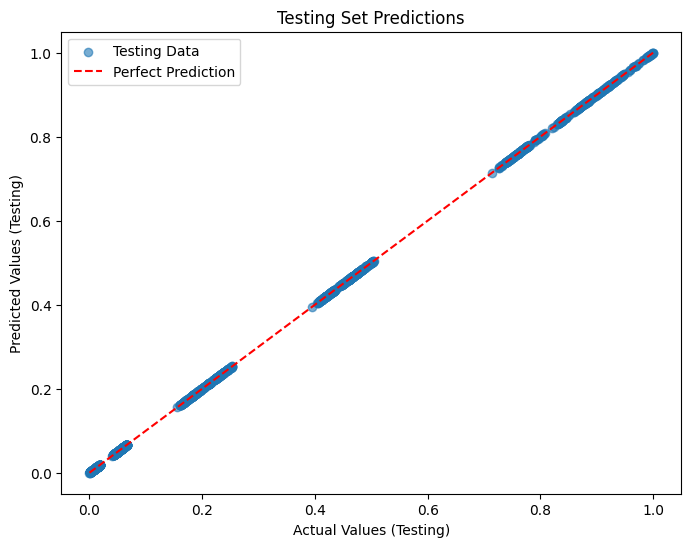

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Training Set Predictions")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, label='Testing Data', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("Testing Set Predictions")
plt.legend()
plt.show()

## CNN Model

Convolutional Neural Networks (CNNs) are a specialized class of deep learning models primarily used for image and spatial data analysis. Their architecture is designed to automatically and adaptively learn spatial hierarchies of features from input data, making them highly effective for tasks like image classification, object detection, and time-series analysis.

In [ ]:
# Define the model
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
dl_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
dl_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred = dl_model.predict(X_test)

print("Below are the evaluation metrics:")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")
r2_results["CNN"] = r2
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
mse_results["CNN"] = mse
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
rmse_results["CNN"] = rmse
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
mae_results["CNN"] = mae
y_train_pred = dl_model.predict(X_train.to_numpy())

Epoch 1/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0416 - mae: 0.1254 - val_loss: 7.6398e-04 - val_mae: 0.0214
Epoch 2/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.1717e-04 - mae: 0.0136 - val_loss: 3.2124e-04 - val_mae: 0.0135
Epoch 3/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3771e-04 - mae: 0.0088 - val_loss: 1.9689e-04 - val_mae: 0.0104
Epoch 4/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.8409e-05 - mae: 0.0075 - val_loss: 1.9252e-04 - val_mae: 0.0102
Epoch 5/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.7077e-05 - mae: 0.0061 - val_loss: 9.8317e-05 - val_mae: 0.0068
Epoch 6/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.9942e-05 - mae: 0.0050 - val_loss: 8.8704e-05 - val_mae: 0.0064
Epoch 7/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.2178e-05 - mae: 0.0045 - val_loss: 7.3284e-05 - val_mae: 0.0058
Epoch 8/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.7714e-05 - mae: 0.0044 - val_loss: 9.0059e-05 - val_mae: 0.

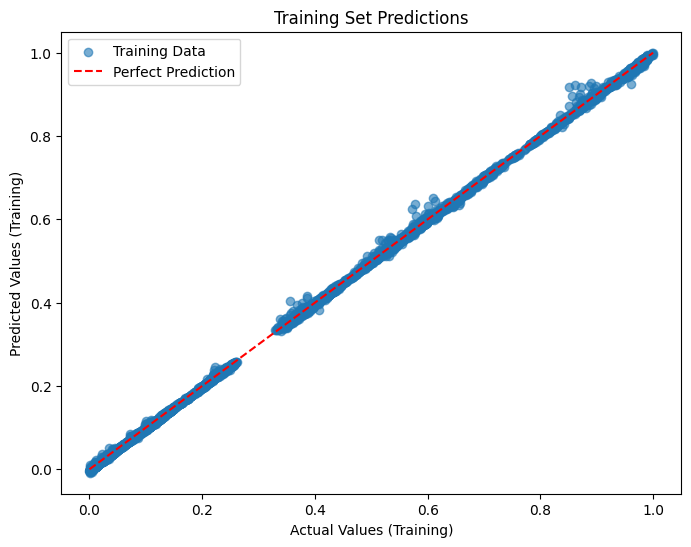

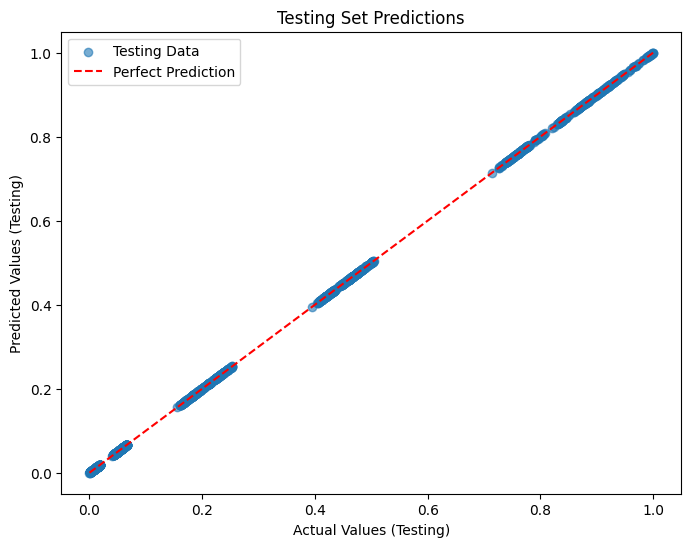

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Training Set Predictions")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, label='Testing Data', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("Testing Set Predictions")
plt.legend()
plt.show()

## An Ensemble model that combines the top 3 best-performing models

Ensemble learning is a powerful approach that combines multiple models to improve prediction accuracy. By integrating XGBoost, K-Nearest Neighbors (KNN), and Random Forest (RF)—three top-performing models—you can leverage their strengths while mitigating individual weaknesses.

In [ ]:

base_models = [
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_split=5, min_samples_leaf=10)),
    ('knn', KNeighborsRegressor(n_neighbors=11))
]

# Define the meta-model
meta_model = LinearRegression()

# Create the ensemble model
ensemble_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the ensemble model
ensemble_model.fit(X_train.to_numpy(), y_train.to_numpy())

# Make predictions
y_pred = ensemble_model.predict(X_test.to_numpy())


print("Below are the evaluation metrics:")
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")
r2_results["Ensemble"] = r2
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
mse_results["Ensemble"] = mse
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
rmse_results["Ensemble"] = rmse
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
mae_results["Ensemble"] = mae
y_train_pred = ensemble_model.predict(X_train.to_numpy())

Below are the evaluation metrics:
R^2: 0.9997647278392666
MSE: 2.2541263246904743e-05
RMSE: 0.004747764026034228
MAE: 0.003234214088253081


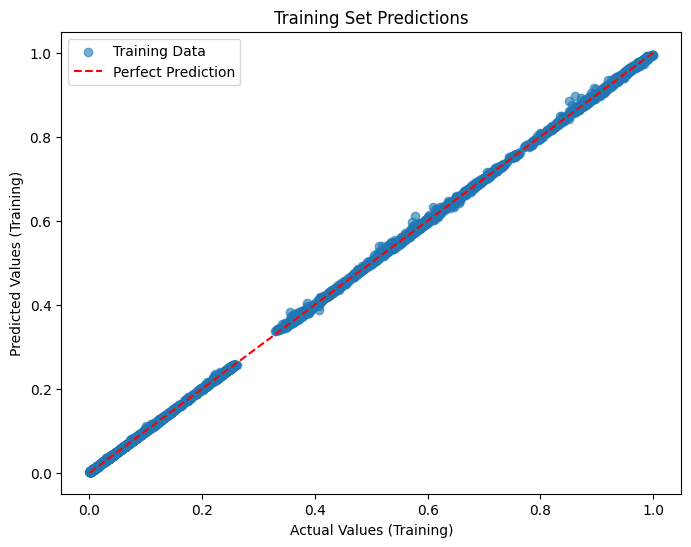

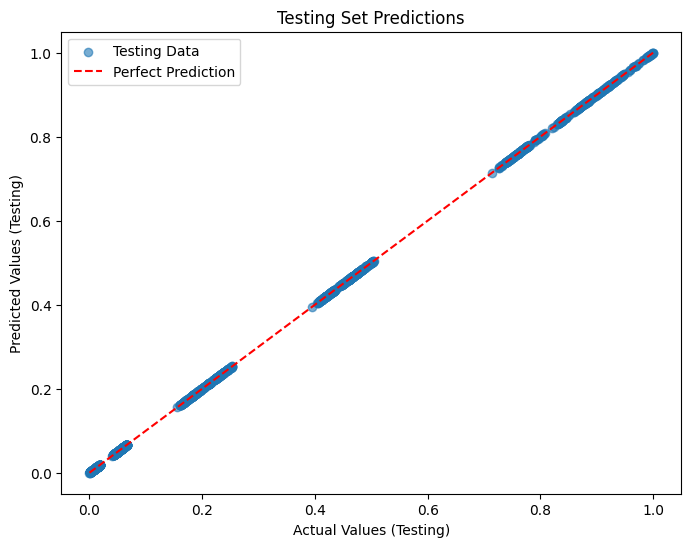

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Training Set Predictions")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, label='Testing Data', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("Testing Set Predictions")
plt.legend()
plt.show()

## Models Evaluation And Model performance visualization

In [ ]:
# Find the best model based on R-squared
best_model_r2 = max(r2_results, key=r2_results.get)
print(f"Best model based on R-squared: {best_model_r2} with R^2: {r2_results[best_model_r2]}")

# Find the best model based on MSE
best_model_mse = min(mse_results, key=mse_results.get)
print(f"Best model based on MSE: {best_model_mse} with MSE: {mse_results[best_model_mse]}")

Best model based on R-squared: Ensemble with R^2: 0.9997647278392666
Best model based on MSE: Ensemble with MSE: 2.2541263246904743e-05


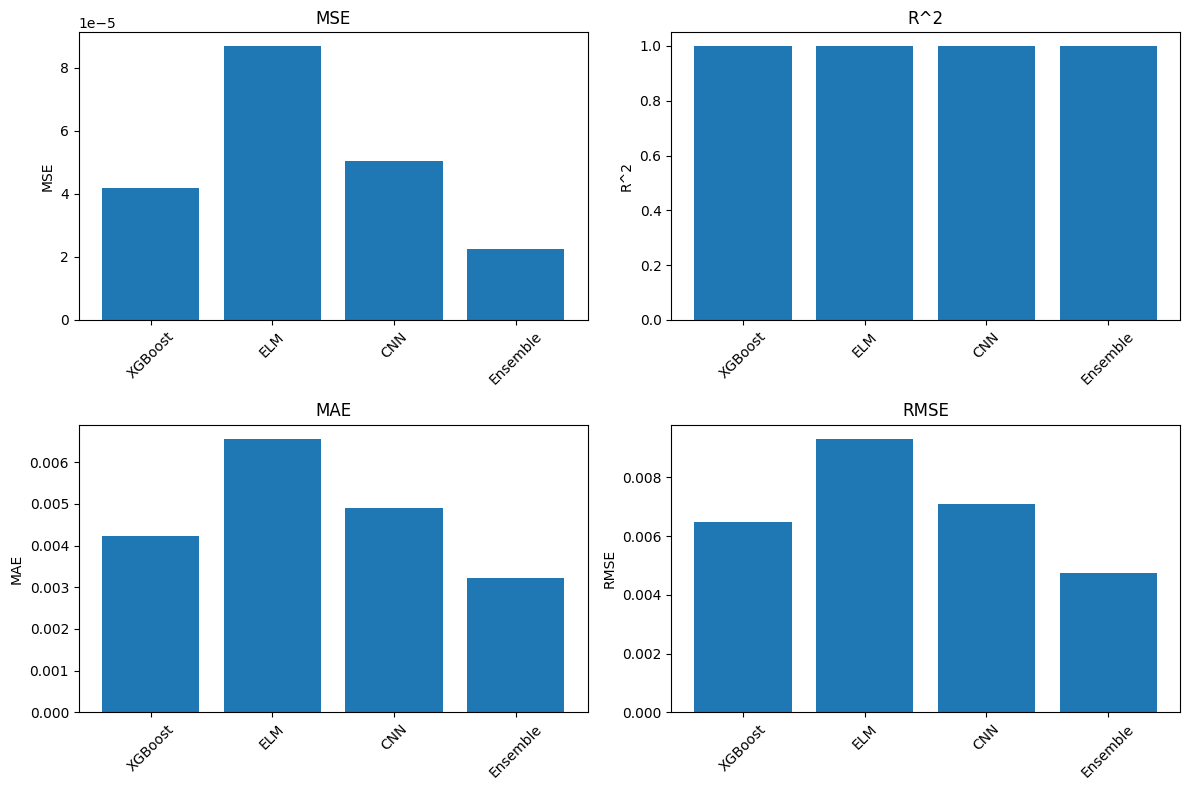

In [ ]:
metrics = ['MSE', 'R^2', 'MAE', 'RMSE']
models = list(mse_results.keys())
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, metric in enumerate(metrics):
    if metric == 'MSE' or metric == 'MAE' or metric == 'RMSE':
      results = [mse_results[model] if metric == 'MSE' else (mae_results[model] if metric == 'MAE' else rmse_results[model]) for model in models ]
    else:
      results = [r2_results[model] for model in models]

    axes[i].bar(models, results)
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

From the above evaluation metrics and visualization plot, we can say that Ensemble Model is performing really good and improved significantly than previous Gradient boosting model. The MSE is really low which means low error and R2 is really high which shows no signs of variability. It shows no signs of overfitting or underfitting in our model.